In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare,chi2_contingency


In [163]:
df=pd.read_excel("D:\\Documents\\College\\Semesters\\Sem7\\Capstone 2\\Telco_customer_churn.xlsx")

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [165]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors= 'coerce')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [167]:
df.dropna(subset=['Total Charges'], inplace=True)

<AxesSubplot:>

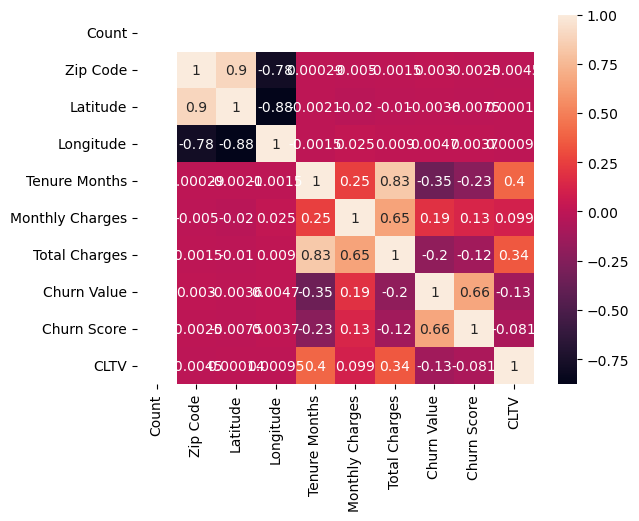

In [168]:
sns.heatmap(df.corr(),annot=True)

In [169]:
df["Churn Label"].value_counts()

No     5163
Yes    1869
Name: Churn Label, dtype: int64

In [170]:
df.drop(columns=["Latitude","Longitude","Lat Long","Country","State","Churn Value","Count","City","CustomerID"],inplace=True)

In [171]:
df.head()

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV,Churn Reason
0,90003,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,86,3239,Competitor made better offer
1,90005,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,67,2701,Moved
2,90006,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,86,5372,Moved
3,90010,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,84,5003,Moved
4,90015,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,89,5340,Competitor had better devices


In [172]:
df.nunique()

Zip Code             1652
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          72
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1584
Total Charges        6530
Churn Label             2
Churn Score            85
CLTV                 3435
Churn Reason           20
dtype: int64

In [173]:
for i in df.columns:
    if "No phone service" in df[i].unique():
        df[i].replace(["No phone service"],["No"],inplace=True)
    elif "No internet service" in df[i].unique():
        df[i].replace(["No internet service"],["No"],inplace=True)


C:\Users\ayush\AppData\Local\Temp\ipykernel_5908\3377248454.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "No phone service" in df[i].unique():
C:\Users\ayush\AppData\Local\Temp\ipykernel_5908\3377248454.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif "No internet service" in df[i].unique():


In [174]:
for col in df.columns:
    if df[col].dtype=="object":
        table=pd.crosstab(df['Churn Label'],df[col])
        stat, pvalue, dof, expec = chi2_contingency(table)
        conf=0.05
        if pvalue<=conf:
            print(col,"is significantly affecting target, P-value=",pvalue)
        else:
            print(col, "is useless, P-value=",pvalue)

Gender is useless, P-value= 0.4904884707065509
Senior Citizen is significantly affecting target, P-value= 2.4792557203954705e-36
Partner is significantly affecting target, P-value= 3.97379757451591e-36
Dependents is significantly affecting target, P-value= 7.0985853631020365e-96
Phone Service is useless, P-value= 0.34992398942431924
Multiple Lines is significantly affecting target, P-value= 0.0008694082815826175
Internet Service is significantly affecting target, P-value= 5.831198962236941e-159
Online Security is significantly affecting target, P-value= 1.37424000884718e-46
Online Backup is significantly affecting target, P-value= 6.259257129714726e-12
Device Protection is significantly affecting target, P-value= 3.346074945648779e-08
Tech Support is significantly affecting target, P-value= 3.2328683255491206e-43
Streaming TV is significantly affecting target, P-value= 1.3164336109407092e-07
Streaming Movies is significantly affecting target, P-value= 3.857900347663822e-07
Contract is 

In [160]:
df.groupby(["Churn Label","Gender"])["Gender"].count()

Churn Label  Gender
No           Female    2544
             Male      2619
Yes          Female     939
             Male       930
Name: Gender, dtype: int64

In [161]:
df.drop(columns=["Gender"],inplace=True)

In [138]:
cateogorical_columns =  ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']

c:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly Charges', ylabel='Churn Score'>

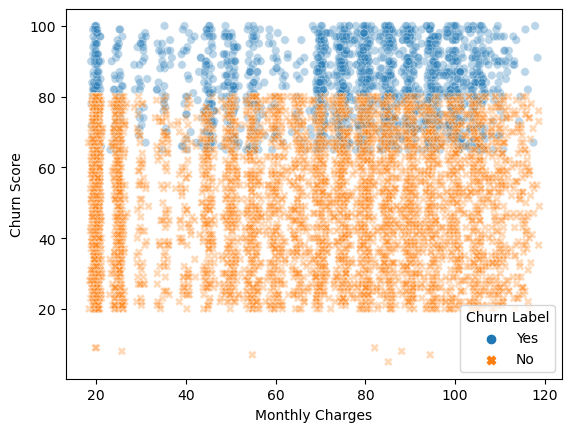

In [151]:
sns.scatterplot(df["Monthly Charges"],df["Churn Score"],hue=df["Churn Label"],style=df["Churn Label"],alpha=0.3)

In [140]:
df.groupby(["Churn Label"])["Churn Score"].mean()

Churn Label
No     50.101491
Yes    82.510433
Name: Churn Score, dtype: float64

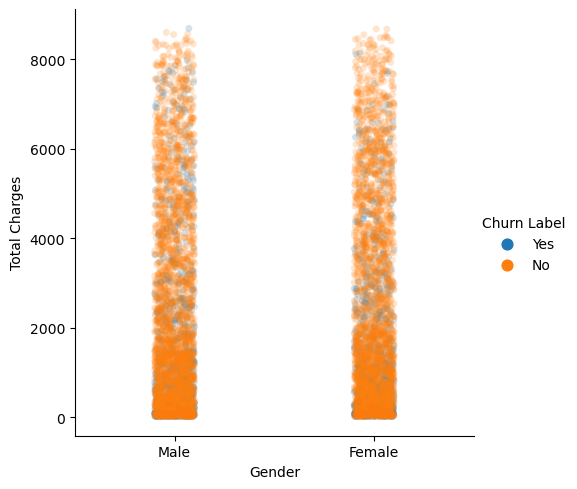

In [155]:
sns.catplot(data=df,x="Gender",y="Total Charges",hue="Churn Label",jitter=True,alpha=0.2)

In [142]:
df["Churn Reason"].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

In [143]:
df["Tech Support"].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: Tech Support, dtype: int64

In [144]:
df[df["Tech Support"]=="No internet service"]["Internet Service"]

7       No
22      No
65      No
99      No
103     No
        ..
7023    No
7024    No
7025    No
7033    No
7038    No
Name: Internet Service, Length: 1520, dtype: object

In [146]:
df.nunique()

CustomerID           7032
Zip Code             1652
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          72
Phone Service           2
Multiple Lines          2
Internet Service        3
Online Security         2
Online Backup           2
Device Protection       2
Tech Support            2
Streaming TV            2
Streaming Movies        2
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1584
Total Charges        6530
Churn Label             2
Churn Score            85
CLTV                 3435
Churn Reason           20
dtype: int64

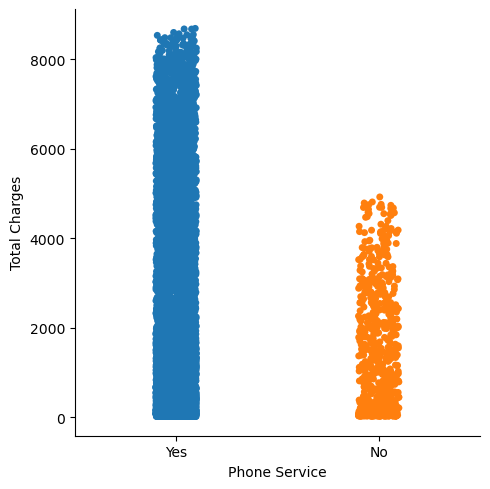

In [178]:
sns.catplot(data=df,x="Phone Service",y="Total Charges")

In [183]:
numeric_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

c:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ayush\anaconda3\lib\si

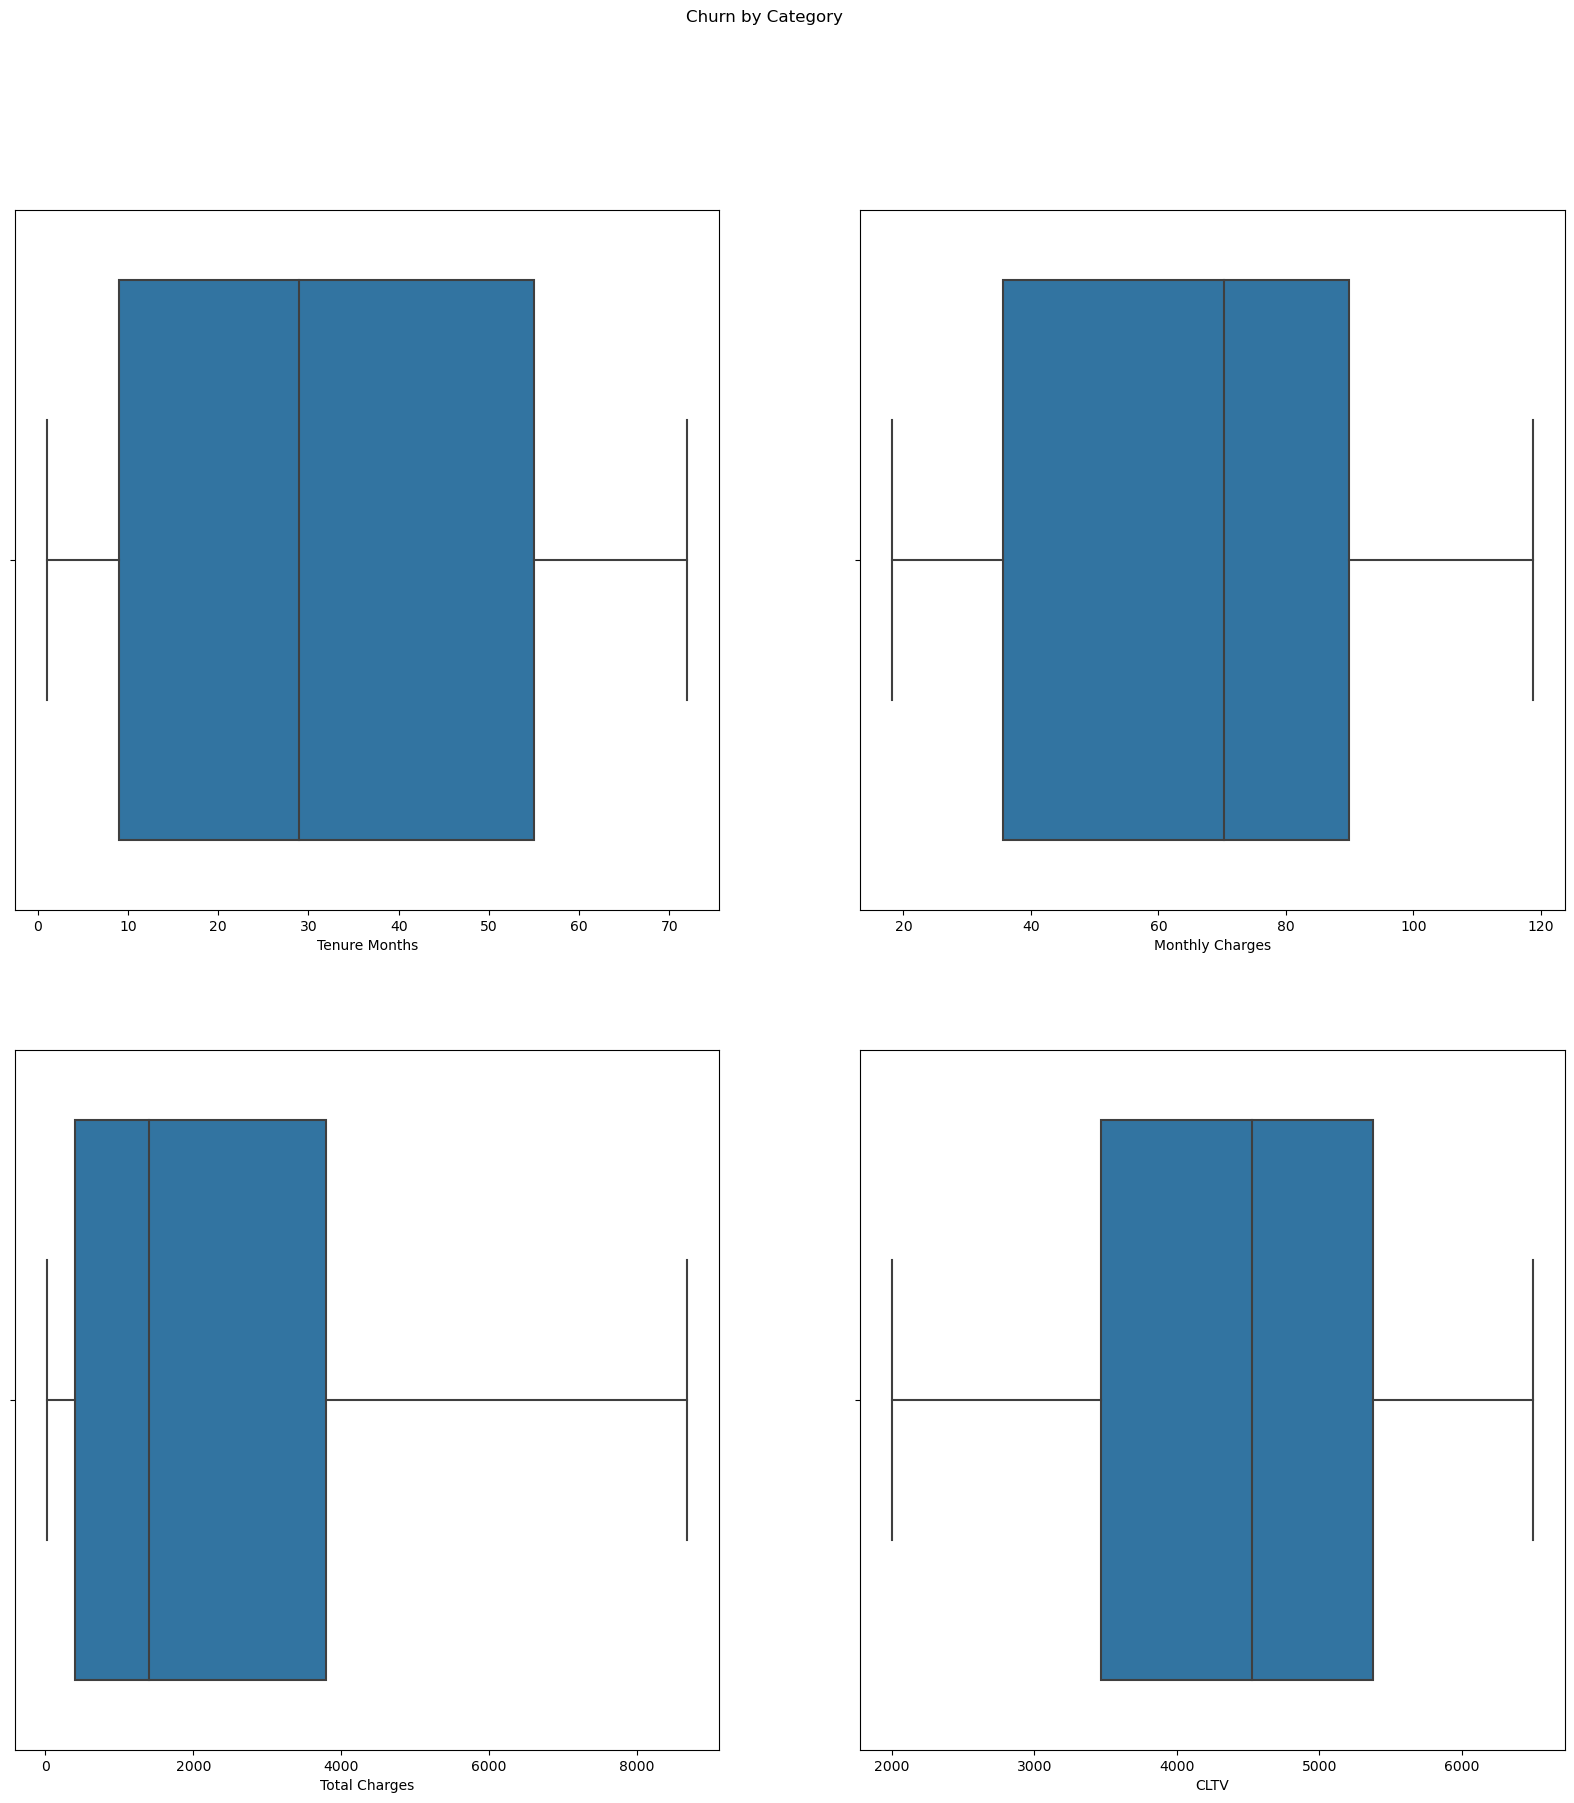

In [195]:
# fig,ax=plt.subplots(2,2)
# ax.flatten()

# for i in range(len(numeric_cols)):
#     axs=ax[i]
#     sns.boxplot(df[numeric_cols[i]],ax=axs)

fig, axes = plt.subplots(2,2, figsize = (20,20))
axes = axes.flatten()
fig.suptitle("Boxplots for numerical columns`")
for i in range(len(numeric_cols)):
    ax = axes[i]
    sns.boxplot(df[numeric_cols[i]],ax=ax,hue=df["Churn Label"])

<AxesSubplot:xlabel='Churn Label', ylabel='Tenure Months'>

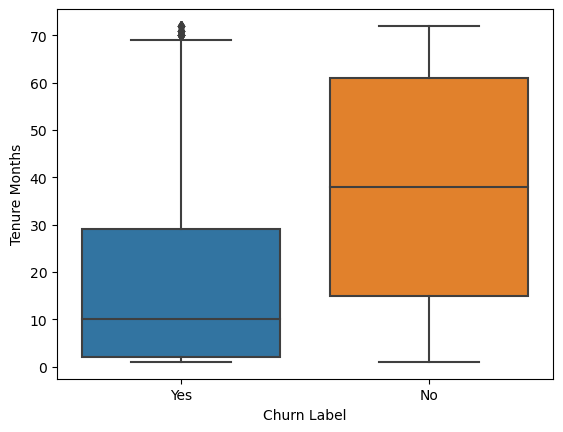

In [207]:
sns.boxplot(x=df["Churn Label"],y=df["Tenure Months"])

In [204]:
df[df["Phone Service"]=="No"]["Internet Service"].value_counts()

DSL    680
Name: Internet Service, dtype: int64

In [179]:
df.groupby(["Phone Service","Churn Label"])["Churn Label"].count()

Phone Service  Churn Label
No             No              510
               Yes             170
Yes            No             4653
               Yes            1699
Name: Churn Label, dtype: int64

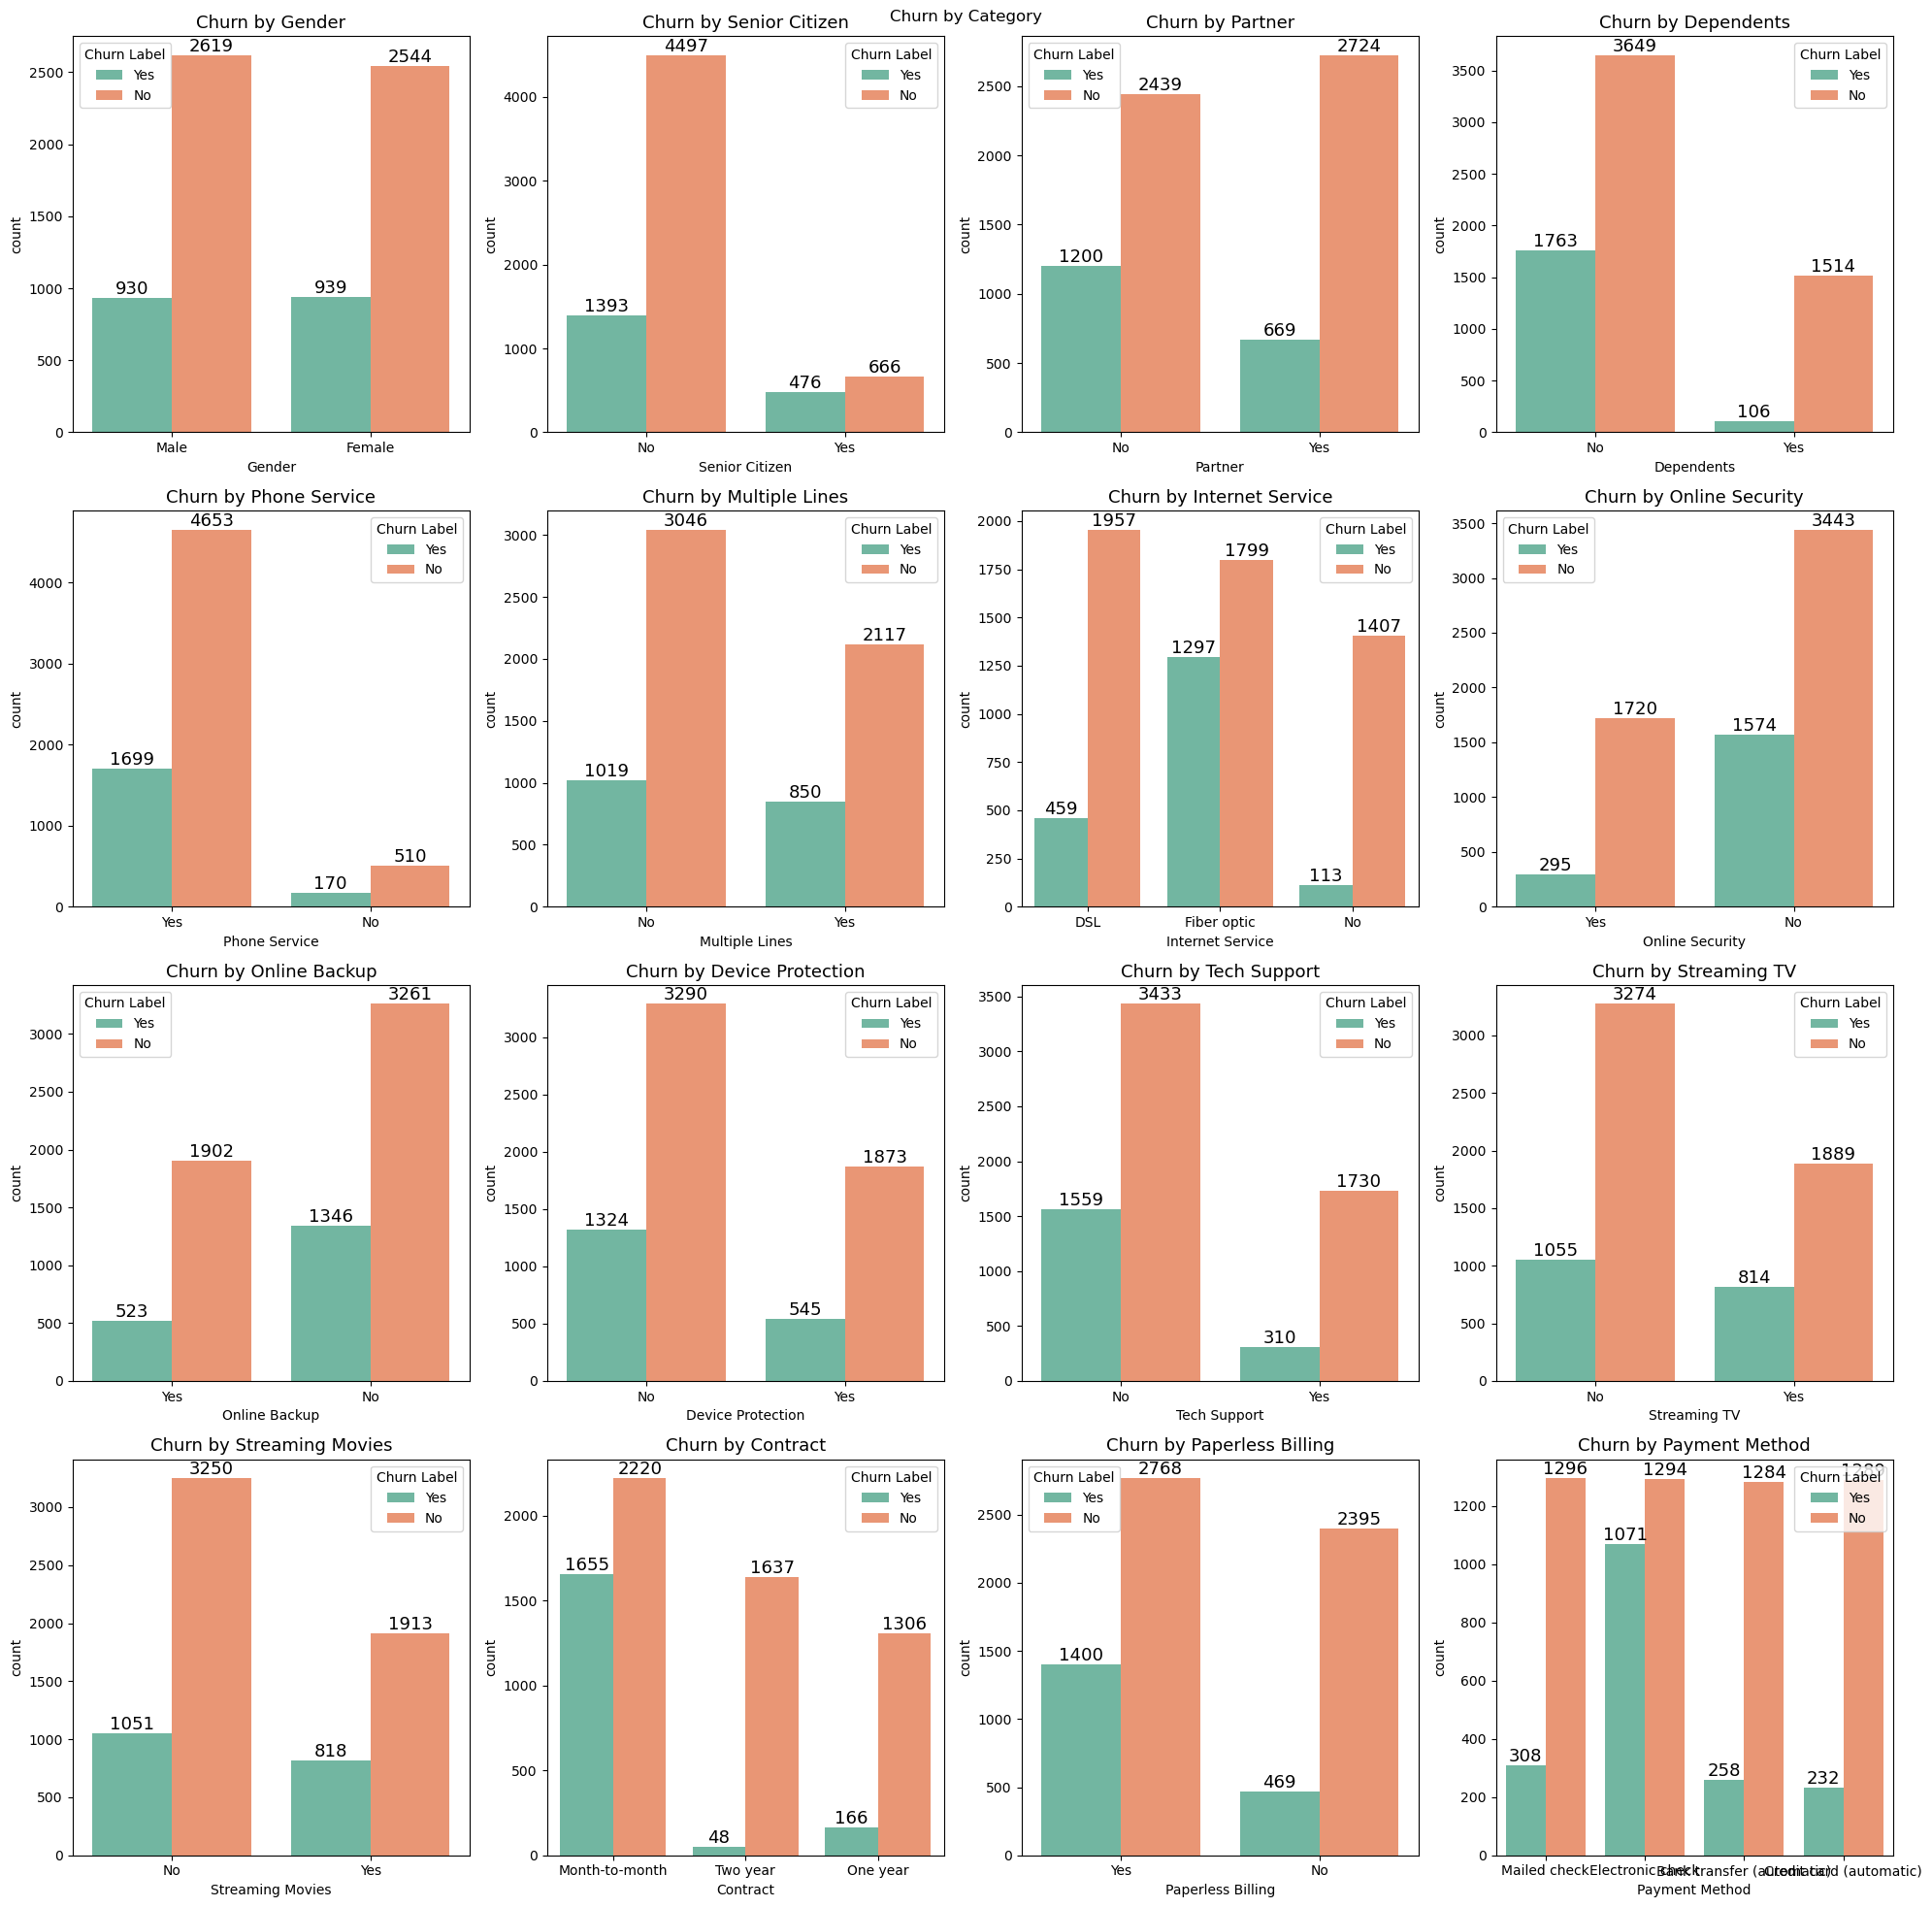

In [198]:
#Categorical Features v/s Churn Label

cateogorical_columns =  ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
cat_df = df[cateogorical_columns]

fig, axes = plt.subplots(4,4, figsize = (20,20))
axes = axes.flatten()
fig.suptitle("Churn by Category")
for i, col in enumerate(cat_df.columns):
    ax = axes[i]
    sns.countplot(data = df, x = col, hue = 'Churn Label', ax = ax, palette="Set2")
    ax.set_title(f"Churn by {col}", fontsize = 13)
    plt.tight_layout(pad = 0.6)

    for i in ax.containers:
        ax.bar_label(i, fontsize = 13)

plt.tight_layout()

In [209]:
# Only phone service, Only Internet service, Both 
phone_only_df = df[(df['Phone Service'] =='Yes') & (df['Internet Service'] =='No')]
internet_only_df = df[(df['Phone Service'] =='No') & (df['Internet Service'] !='No')]
internet_and_phone_df =  df[(df['Phone Service'] =='Yes') & (df['Internet Service'] !='No')]

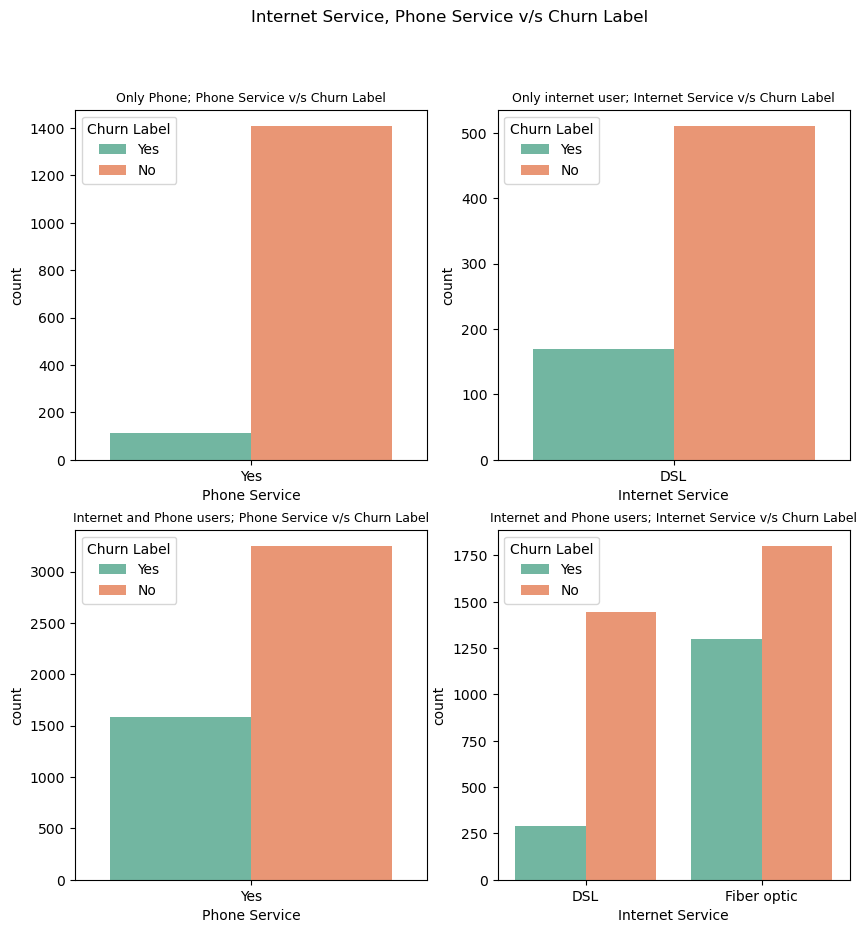

In [214]:
fontsz = 9
fig, axes = plt.subplots(2,2, figsize = (10,10))
axes = axes.flatten()
fig.suptitle('Internet Service, Phone Service v/s Churn Label')

sns.countplot(data = phone_only_df, x = 'Phone Service', hue = 'Churn Label', ax = axes[0], palette='Set2')
axes[0].set_title('Only Phone; Phone Service v/s Churn Label', fontsize = fontsz)

sns.countplot(data = internet_only_df, x = 'Internet Service', hue = 'Churn Label', ax = axes[1], palette='Set2')
axes[1].set_title('Only internet user; Internet Service v/s Churn Label', fontsize = fontsz)

sns.countplot(data = internet_and_phone_df, x = 'Phone Service', hue = 'Churn Label', ax = axes[2], palette='Set2')
axes[2].set_title('Internet and Phone users; Phone Service v/s Churn Label', fontsize = fontsz)

sns.countplot(data = internet_and_phone_df, x = 'Internet Service', hue = 'Churn Label', ax = axes[3], palette='Set2')
axes[3].set_title('Internet and Phone users; Internet Service v/s Churn Label', fontsize = fontsz)

plt.show()

In [211]:
numeric_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

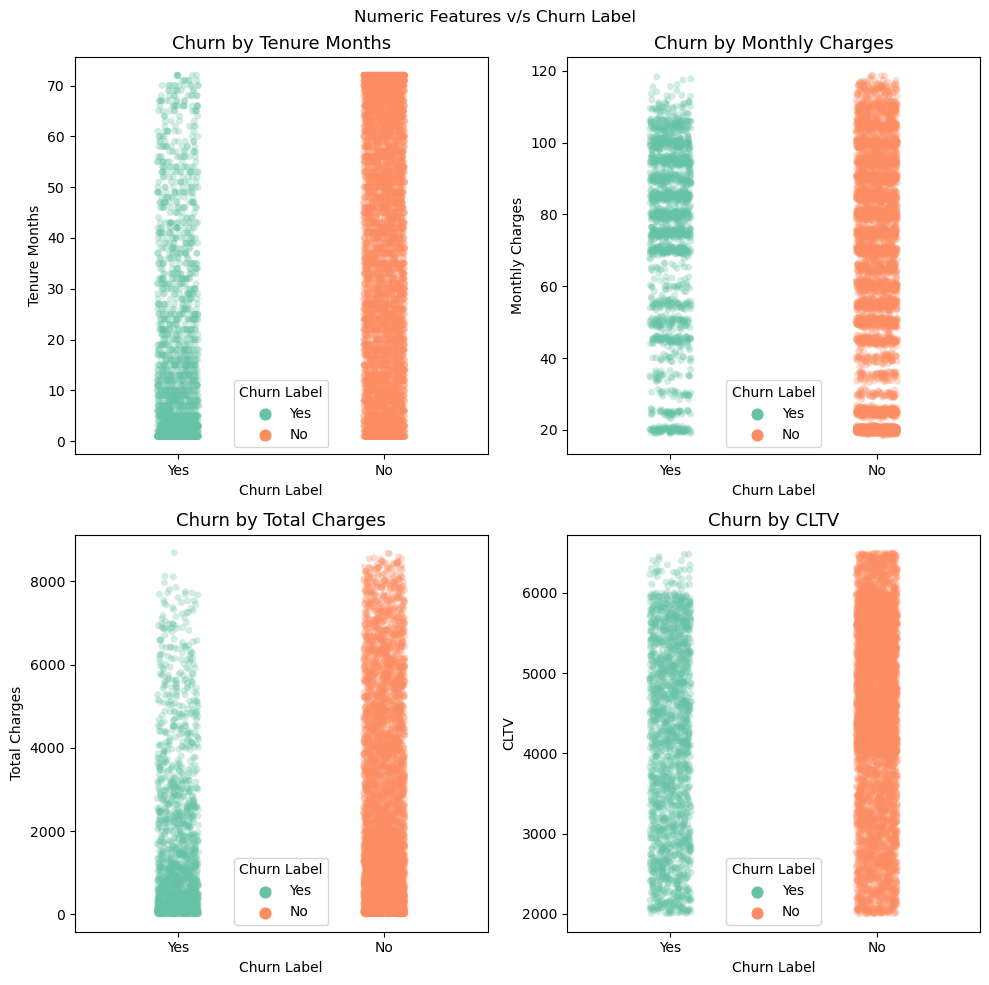

In [212]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
axes = axes.flatten()
fig.suptitle('Numeric Features v/s Churn Label')
for i,col in enumerate(numeric_cols):
    ax = axes[i]
    sns.stripplot(data = df, x = 'Churn Label',y = col, hue = 'Churn Label', ax = ax, palette = 'Set2', alpha = 0.3)
    ax.set_title(f'Churn by {col}', fontsize = 13)
    plt.tight_layout()

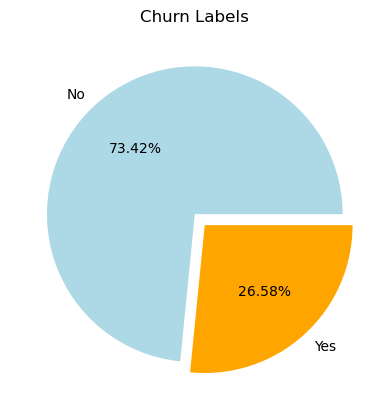

In [213]:
churn_label_count = df["Churn Label"].value_counts()

plt.pie(churn_label_count, labels = churn_label_count.index, explode = [0,0.1], autopct="%.2f%%",colors = ['lightblue', 'orange'])
plt.title('Churn Labels')
plt.show()